In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Load Data

In [2]:
jw_df = pd.read_csv('../../data/figure01_JW_table1.csv',)
jw_df['age'] = (jw_df['plume_age_lower']+jw_df['plume_age_upper'])/2
jw_df['N'] = jw_df['N'].replace(np.nan, 1)

# Plot

### Figure 1

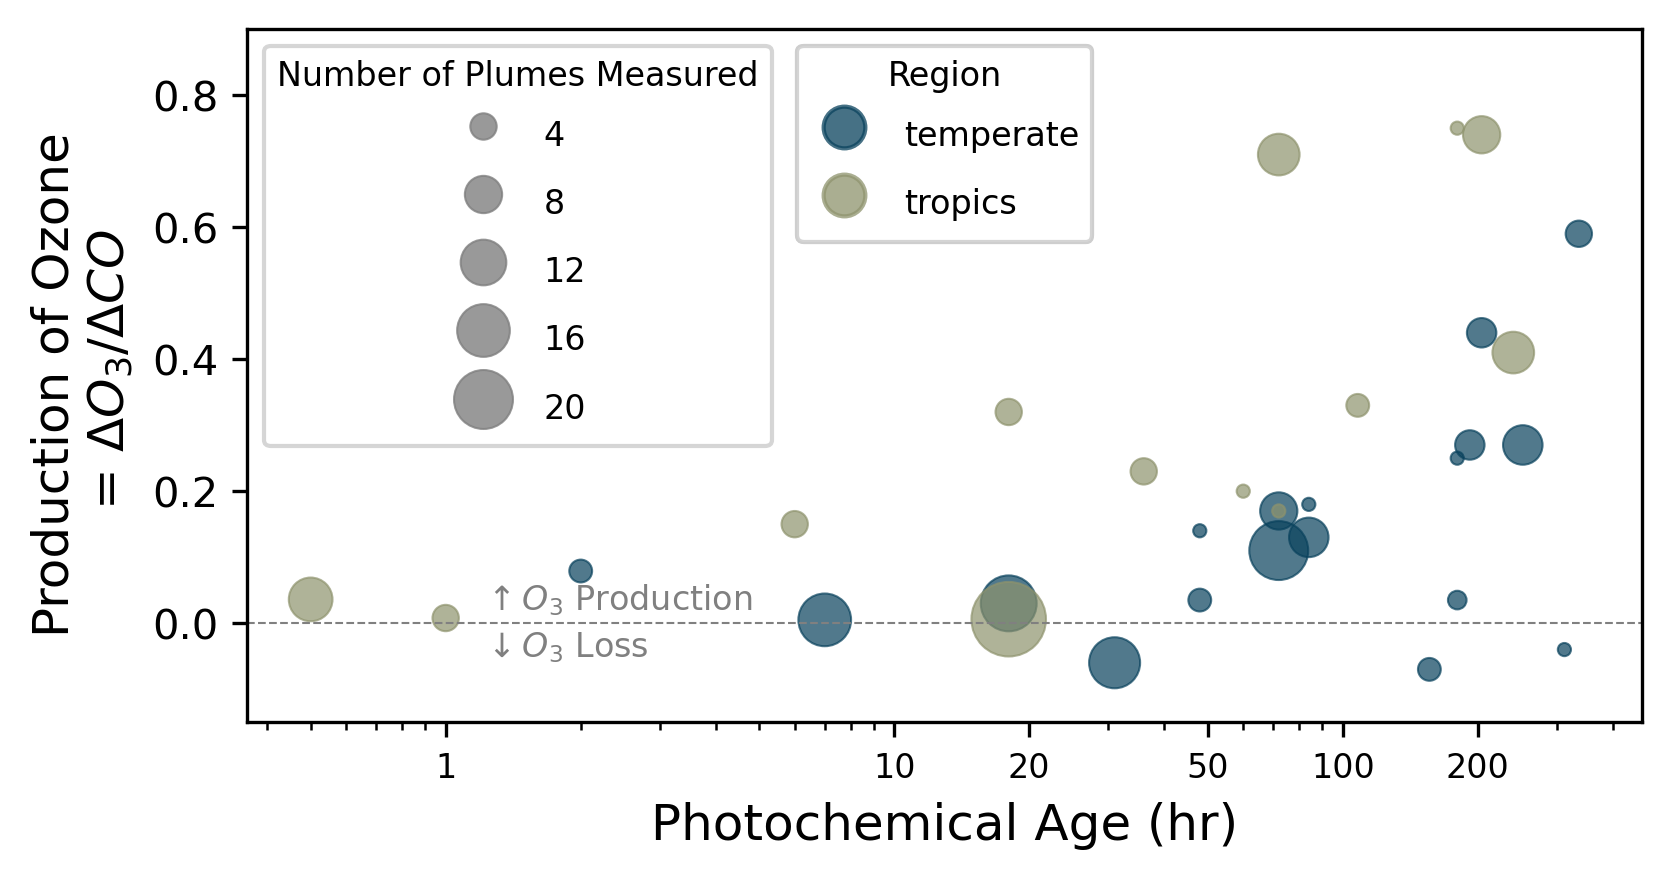

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), dpi=300)
fig.set_facecolor("none")
ax.set_facecolor("none")

sf = 10

# Define your custom dictionaries
color_dict = {'temperate': '#08415C', 'tropics': '#8E936D'}
marker_dict = {'temperate': 'o', 'tropics': '^'}
location_dict = {'temperate': 'upper left', 'tropics': 'upper center'}

# Create the scatter plot
scatter = ax.scatter(
    jw_df['age'], 
    jw_df['delO3delCO_mean'], 
    s=jw_df['N'] * sf, 
    c=jw_df['region'].map(color_dict), 
    alpha=0.7,
    # edgecolors='k',
    linewidth=0.5
)

# First legend: Size-based legend for "Number of Plumes Measured"
# produce a legend with a cross-section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
sizes = [4, 8, 12, 16, 20]  # The desired sizes
handles = [plt.scatter([], [], s=size * sf, color='gray', alpha=0.8, linewidth=0.5) for size in sizes]

# Adjust the labels to show integer values of N
size_labels = [int(int(label.split('{')[1].split('}')[0]) / sf) for label in labels]
legend1 = ax.legend(
    handles, #handles[0:8:2], 
    sizes, #size_labels[0:8:2], 
    loc='upper left', 
    title="Number of Plumes Measured", 
    fontsize=8,
    title_fontsize=8,  # Set the title font size
    handleheight=2,  # Increase the space between legend handles
    # labelspacing=1.2  # Increase the space between legend labels
)
ax.add_artist(legend1)

# Second legend: Color-based legend for "Region"
# Creating custom legend markers for regions
markers = [
    plt.Line2D(
        [0], [0], 
        color=color, 
        alpha=0.7,
        marker='o', 
        linestyle='', 
        markersize=10,
        linewidth=0.5

    ) for color in color_dict.values()
]
legend2 = ax.legend(
    markers, 
    color_dict.keys(), 
    numpoints=1, 
    loc='upper center',
    title="Region", 
    title_fontsize=8,  # Set the title font size
    fontsize=8,
    handleheight=2,  # Increase the space between legend handles
)
ax.add_artist(legend2)

# horizontal line indicating zero
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax.text(1.2, 0.02 ,r'$\uparrow$$O_3$ Production', color='gray', fontsize=8)
ax.text(1.2, -0.05 ,r'$\downarrow$$O_3$ Loss', color='gray', fontsize=8)

# Set plot details
ax.set_xscale('log')
ax.set_ylim(-0.15, 0.9)
ax.set_ylabel('Production of Ozone \n = $\Delta O_3 / \Delta CO$', fontsize=12)

ax.set_xlabel('Photochemical Age (hr)', fontsize=12)

ax.set_xticks([1, 10, 20, 50, 100, 200])
ax.set_xticklabels([1, 10, 20, 50, 100, 200], fontsize=8)

# ax.set_title('Previous Wildfire Ozone Production Studies', fontsize=10)

# Save the figure
#save figure as pdf
plt.savefig("../../figures/fig_01.pdf", bbox_inches='tight', dpi=300)
plt.show()